In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Final Project/claims_data_consolidated.csv"
df = pd.read_csv(path, encoding= 'unicode_escape')

In [ ]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [ ]:
df.head()

,PolicyNumber_0,PolicyStatus_0,PIP_Personal_Injury_Protection_coverage_Y_N,PIP_limit,PD_Coverage,PD_limit,Towing_coverage_Y_n,If_insurer_has_BI_coverage_yn,BI_coverage_amount,MP_YN,MP_medpay_limit,Premium_payment_value,Risk_rating_of_policy,Policy_amendments_details,Comp_coverage,Comp_coverage_amount_limit,SumInsured_0,InsuredFirstname_0,InsuredLastName_0,Gender_applicant,Marital_status_applicant,CustomerId_0,Address1_0,Address2_0,Phoneno_0,Residency_type,Occupational_details,Tenure_prior_insurer_coverage,Medical_history,Tenure_for_insured_withcompany,Loan_on_vehicle,Credit_score_financial,ClaimRegistrationNumber_0,Claimstatus_0,Claimssettlementnumber_0,Timeofaccident_0,Notifiedby_0,Relationship_0,Placeofloss_0,Causeofloss_0,...,DrunkandDriv_0,GarageName_0,GarageAddress_0,PoliceComplaintLodgedYN_0,FIRno_0,ListitemsStolen_0,RepairEstimate_0,NonTraceableCertificate_0,RepairBill_0,Wasthecartowed_0,TowingReceipt_0,PurchaseBills_0,ClaimForm_0,ClaimsHandler_0,ClaimApprovedBy_0,ClaimAmountPaid_0,Cheqno_0,SurveyArranged_0,SurveyorName_0,AmountRecommendedtoPayinthereport_0,ThirdPartyClaimant_0,InsuranceCompanyofTPClaimant_0,ContactDetailsofTPClaimantsInsuranceCompany_0,DetailsofTPPD_0,DetailsofTPInjury_0,AmountClaimedbyTP_0,Advocatename_0,Advocateid_0,HistoryClaimNumber_0,HistoryAmountsettled_0,HistoryClaimtype_0,HistoryClaimStatus_0,TotalNoofclaimsmadepreviously,NoofNPCCancelationofthepolicy,Policyrenewaldetails,PossibleFraud,day,month,year,Timeoftheday
0,AP85781569,Cancelled,Yes,185,Yes,3377,Yes,NO,0,Yes,2605,37.7,Bad,MP,NO,0,1200000.0,Aaarti,Clarke,Female,Single,C176576783,9121.0,Bangalore,9412720721,Own,Services,0,Bad,4,NO,NO,CRA7645364,Closed,NaN,1899-12-31 03:43:01,HOHNIHOHKAIYOHOS,Father,Bangalore,Flood,...,Yes,SM Auto Service,Hyderabad,Yes,76744.0,stereo,NO,NaN,Yes,Yes,No,No,Yes,Baiju Menon,NaN,6433,220124.0,Yes,NORBERT,203925,CHOSOVI,UIC,Bangalore,Car,Death,1003006.0,YOKI,3186.0,APH98350926,0.0,Own damage,Repudiated,8,1,6,Y,31,12,1899,Late Night
1,AP85785622,Active,NO,0,Yes,996,Yes,NO,0,Yes,5566,54.9,Good,Nil,NO,0,1150000.0,Aaarti,Pfilzer,Female,Single,C176570846,3284.0,Assam,9412724884,Own,Consultant,3,Bad,2,NO,NO,CRA7649427,Inprocess,NaN,1899-12-31 22:44:53,Lavigne,Father,Assam,Earthquake,...,Yes,SM Auto Service,Chennai,Yes,73850.0,car alarms,NO,NaN,Yes,Yes,No,Yes,Yes,Pankaj Chawla,NaN,23123,224287.0,Yes,NORBERT,860107,NaN,OICL,Assam,Car,Loss of Sight,NaN,NaN,NaN,APH98354089,0.0,Third Party Property Damage,Repudiated,7,2,3,Y,31,12,1899,Night
2,AP85796396,Active,Yes,837,Yes,251,Yes,Yes,1566,NO,0,28.8,Moderate,PIP,Yes,5159,800000.0,Aaarti,Lonn,Female,Married,C176581510,14958.0,Hyderabad,9412735558,Rented,Engineer,1,Bad,8,Yes,NO,CRA7650191,Settled,CSA7931141,1899-12-31 01:42:33,PHILIP,Others,Hyderabad,Self-Ignition,...,Yes,SM Auto Service,Haryana,Yes,79642.0,battery/Car,Yes,NaN,Yes,Yes,No,Yes,Yes,Baiju Menon,Stacey Heaton,27639,235951.0,Yes,NORBERT,57677,FRISA,UIC,Hyderabad,Fence,Loss of Sight,1377220.0,MATRIKA,1692.0,NaN,NaN,NaN,NaN,0,2,2,Y,31,12,1899,Late Night
3,AP85778014,Active,NO,0,NO,0,NO,NO,0,NO,0,31.4,Moderate,PIP,NO,0,1450000.0,Aaarti,Norenberg,Female,Single,C176563238,96666.0,Hyderabad,9412717276,Own,Factory Labour,0,Bad,0,NO,NO,CRA7632819,Settled,CSA4773123,1899-12-31 12:33:02,WALLER,Father,Hyderabad,Accident,...,Yes,Nagappa Motors,Chennai,No,NaN,tyre,NO,NaN,Yes,Yes,No,No,Yes,Arasu T,Steffey,9429,217679.0,Yes,ACKERMAN,238138,NaN,NIC,Hyderabad,Car,Loss of Sight,NaN,NaN,NaN,APH98347471,0.0,Third Party Property Damage,Repudiated,8,0,10,N,31,12,1899,Noon
4,AP85772277,Active,NO,0,Yes,2744,Yes,Yes,4647,NO,0,65.9,Good,Nil,Yes,5739,1200000.0,Aaarti,Lundeen,Female,Widower,C176567491,90829.0,Cochin,9412711439,Own,Businessman,7,Bad,6,Yes,Yes,CRA7636072,Inprocess,NaN,1899-12-31 20:37:08,DICHALI,Others,Cochin,Earthquake,...,No,Balaji Motors,Bangalore,No,NaN,battery/Car,NO,NaN,No,Yes,No,Yes,Yes,Arasu T,NaN,851,211832.0,Yes,TRISNA,661586,NaN,ICICI Lombard,Cochin,Outer wall,Fracture,NaN,NaN,NaN,APH98341634,35346.0,Third Party Bodil

In [ ]:
#print(df.head(5).to_csv("test.csv"))

In [ ]:
df.columns

Index(['PolicyNumber_0', 'PolicyStatus_0',
       'PIP_Personal_Injury_Protection_coverage_Y_N', 'PIP_limit',
       'PD_Coverage', 'PD_limit', 'Towing_coverage_Y_n',
       'If_insurer_has_BI_coverage_yn', 'BI_coverage_amount', 'MP_YN',
       ...
       'Advocatename_0', 'Advocateid_0', 'HistoryClaimNumber_0',
       'HistoryAmountsettled_0', 'HistoryClaimtype_0', 'HistoryClaimStatus_0',
       'TotalNoofclaimsmadepreviously', 'NoofNPCCancelationofthepolicy',
       'Policyrenewaldetails', 'PossibleFraud'],
      dtype='object', length=101)

In [ ]:
df.index

RangeIndex(start=0, stop=200232, step=1)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(200232, 101)

In [ ]:
df.dtypes

PolicyNumber_0                                 object
PolicyStatus_0                                 object
PIP_Personal_Injury_Protection_coverage_Y_N    object
PIP_limit                                       int64
PD_Coverage                                    object
                                                ...  
HistoryClaimStatus_0                           object
TotalNoofclaimsmadepreviously                   int64
NoofNPCCancelationofthepolicy                   int64
Policyrenewaldetails                            int64
PossibleFraud                                  object
Length: 101, dtype: object

In [ ]:
cols=df.select_dtypes(exclude='int').columns.to_list()
df[cols]=df[cols].astype('category')

In [ ]:
df['Timeofaccident_0'] =  pd.to_datetime(df['Timeofaccident_0'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['day'] = pd.to_datetime(df['Timeofaccident_0']).dt.day
df['month'] = pd.to_datetime(df['Timeofaccident_0']).dt.month
df['year'] = pd.to_datetime(df['Timeofaccident_0']).dt.year
df['Timeoftheday'] = pd.to_datetime(df['Timeofaccident_0']).dt.hour

In [ ]:
df['Timeoftheday'] = ((df['Timeoftheday']) % 24 + 4) // 4
df['Timeoftheday'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [ ]:
df.describe(include= 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,PolicyNumber_0,PolicyStatus_0,PIP_Personal_Injury_Protection_coverage_Y_N,PIP_limit,PD_Coverage,PD_limit,Towing_coverage_Y_n,If_insurer_has_BI_coverage_yn,BI_coverage_amount,MP_YN,MP_medpay_limit,Premium_payment_value,Risk_rating_of_policy,Policy_amendments_details,Comp_coverage,Comp_coverage_amount_limit,SumInsured_0,InsuredFirstname_0,InsuredLastName_0,Gender_applicant,Marital_status_applicant,CustomerId_0,Address1_0,Address2_0,Phoneno_0,Residency_type,Occupational_details,Tenure_prior_insurer_coverage,Medical_history,Tenure_for_insured_withcompany,Loan_on_vehicle,Credit_score_financial,ClaimRegistrationNumber_0,Claimstatus_0,Claimssettlementnumber_0,Timeofaccident_0,Notifiedby_0,Relationship_0,Placeofloss_0,Causeofloss_0,...,DrunkandDriv_0,GarageName_0,GarageAddress_0,PoliceComplaintLodgedYN_0,FIRno_0,ListitemsStolen_0,RepairEstimate_0,NonTraceableCertificate_0,RepairBill_0,Wasthecartowed_0,TowingReceipt_0,PurchaseBills_0,ClaimForm_0,ClaimsHandler_0,ClaimApprovedBy_0,ClaimAmountPaid_0,Cheqno_0,SurveyArranged_0,SurveyorName_0,AmountRecommendedtoPayinthereport_0,ThirdPartyClaimant_0,InsuranceCompanyofTPClaimant_0,ContactDetailsofTPClaimantsInsuranceCompany_0,DetailsofTPPD_0,DetailsofTPInjury_0,AmountClaimedbyTP_0,Advocatename_0,Advocateid_0,HistoryClaimNumber_0,HistoryAmountsettled_0,HistoryClaimtype_0,HistoryClaimStatus_0,TotalNoofclaimsmadepreviously,NoofNPCCancelationofthepolicy,Policyrenewaldetails,PossibleFraud,day,month,year,Timeoftheday
count,200232,200232,200232,200232.000000,200232,200232.000000,200232,200232,200232.000000,200232,200232.000000,200232.0,200232,200232,200232,200232.000000,200232.0,200232,200232,200232,200232,200232,200232.0,200232,2.002320e+05,200232,200232,200232.000000,200232,200232.000000,200232,200232,200232,200232,48276,200232,200232,200232,200232,200232,...,200232,200232,200232,200232,99306.0,200232,200232,0,200232,200232,200232,200232,200232,200232,48276,200232.000000,200232.0,200232,200232,2.002320e+05,82782,200232,200232,200232,200232,82782.0,82782,82782.0,182177,182177.0,182177,182177,200232.000000,200232.000000,200232.000000,200000,200232.0,200232.0,200232.0,200232
unique,200232,2,2,NaN,2,NaN,2,2,NaN,2,NaN,601.0,3,3,2,NaN,54.0,5837,5411,2,4,200232,200232.0,9,NaN,2,7,NaN,2,NaN,2,2,200232,5,298,1229,933,6,9,6,...,2,15,7,2,99306.0,4,2,0,2,2,2,2,1,5,5,NaN,200232.0,1,945,NaN,456,6,9,4,4,454.0,459,500.0,182177,253.0,4,2,NaN,NaN,NaN,2,NaN,NaN,NaN,6
top,AP85982689,Active,Yes,NaN,Yes,NaN,Yes,Yes,NaN,Yes,NaN,51.4,Moderate,PIP,Yes,NaN,1500000.0,Regan,Gwenigale,Male,Widower,C176777899,200232.0,Hyderabad,NaN,Rented,Own,NaN,Good,NaN,Yes,Yes,CRA7846485,Closed,CSA9972707,1899-12-31 03:51:29,ALBERTA,Father,Hyderabad,Theft,...,Yes,SM Auto Service,Cochin,No,171533.0,stereo,Yes,NaN,Yes,Yes,No,Yes,Yes,Baiju Menon,Stacey Heaton,NaN,421245.0,Yes,NORBERT,NaN,ZIHNA,RSA,Hyderabad,Fence,Fracture,100000.0,HAMILTON,3171.0,APH98551999,0.0,Third Party Property Damage,Repudiated,NaN,NaN,NaN,N,NaN,NaN,NaN,Evening
freq,1,150174,100116,NaN,100116,NaN,100116,100116,NaN,100116,NaN,384.0,66744,66744,100116,NaN,12798.0,35,38,100116,50058,1,1.0,28998,NaN,100116,28605,NaN,100116,NaN,100116,100116,1,50058,162,324,9072,42606,28998,59616,...,100116,25002,34668,100926,1.0,51516,100116,NaN,100602,140616,100278,104166,200232,42282,10368,NaN,1.0,200232,25002,NaN,486,36774,28998,52812,53136,6480.0,648,324.0,1,144589.0,49411,144589,NaN,NaN,NaN,150000,NaN,NaN,NaN,35964
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1899-12-31 00:00:16,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1899-12-31 23:57:08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
df.tail()

,PolicyNumber_0,PolicyStatus_0,PIP_Personal_Injury_Protection_coverage_Y_N,PIP_limit,PD_Coverage,PD_limit,Towing_coverage_Y_n,If_insurer_has_BI_coverage_yn,BI_coverage_amount,MP_YN,MP_medpay_limit,Premium_payment_value,Risk_rating_of_policy,Policy_amendments_details,Comp_coverage,Comp_coverage_amount_limit,SumInsured_0,InsuredFirstname_0,InsuredLastName_0,Gender_applicant,Marital_status_applicant,CustomerId_0,Address1_0,Address2_0,Phoneno_0,Residency_type,Occupational_details,Tenure_prior_insurer_coverage,Medical_history,Tenure_for_insured_withcompany,Loan_on_vehicle,Credit_score_financial,ClaimRegistrationNumber_0,Claimstatus_0,Claimssettlementnumber_0,Timeofaccident_0,Notifiedby_0,Relationship_0,Placeofloss_0,Causeofloss_0,...,DrunkandDriv_0,GarageName_0,GarageAddress_0,PoliceComplaintLodgedYN_0,FIRno_0,ListitemsStolen_0,RepairEstimate_0,NonTraceableCertificate_0,RepairBill_0,Wasthecartowed_0,TowingReceipt_0,PurchaseBills_0,ClaimForm_0,ClaimsHandler_0,ClaimApprovedBy_0,ClaimAmountPaid_0,Cheqno_0,SurveyArranged_0,SurveyorName_0,AmountRecommendedtoPayinthereport_0,ThirdPartyClaimant_0,InsuranceCompanyofTPClaimant_0,ContactDetailsofTPClaimantsInsuranceCompany_0,DetailsofTPPD_0,DetailsofTPInjury_0,AmountClaimedbyTP_0,Advocatename_0,Advocateid_0,HistoryClaimNumber_0,HistoryAmountsettled_0,HistoryClaimtype_0,HistoryClaimStatus_0,TotalNoofclaimsmadepreviously,NoofNPCCancelationofthepolicy,Policyrenewaldetails,PossibleFraud,day,month,year,Timeoftheday
200227,AP85839744,Cancelled,NO,0,Yes,3302,NO,NO,0,NO,0,27.4,Good,MP,Yes,1234,1200000.0,Zulqarnain,Plato,Male,Single,C176624968,157396.0,Mumbai,9412878906,Rented,Own,4,Good,4,NO,Yes,CRA7793549,Closed,NaN,1899-12-31 16:31:10,BEADUTUN,Driver,Mumbai,Accident,...,No,Ganesh Auto Services,Mumbai,Yes,150287.0,battery/Car,NO,NaN,Yes,Yes,Yes,No,Yes,Baiju Menon,NaN,8530,378309.0,Yes,OCELFA,1236455,HALSTEAD,OICL,Mumbai,Outer wall,Fracture,556753.0,WINWARD,1068.0,APH98408101,0.0,Own damage,Repudiated,6,0,6,N,31,12,1899,Evening
200228,AP85841418,Active,NO,0,NO,0,NO,NO,0,NO,0,67.2,Bad,MP,NO,0,1450000.0,Zulqarnain,Kuo,Female,Married,C176636632,169070.0,Kolkata,9412880670,Rented,Own,8,Bad,5,NO,Yes,CRA7705213,Repudiated,NaN,1899-12-31 20:28:19,JASPER,Others,Kolkata,Theft,...,Yes,VMR Motor Services,Cochin,No,NaN,tyre,NO,NaN,Yes,No,No,No,Yes,RKT Krishnan,NaN,24318,380073.0,Yes,TATANKA-PTECILA,655398,NaN,RSA,Kolkata,Fence,Loss of Sight,NaN,NaN,NaN,APH98410875,0.0,Third Party Property Damage,Repudiated,4,1,8,N,31,12,1899,Night
200229,AP85845681,Active,NO,0,NO,0,NO,Yes,4454,Yes,2381,20.6,Moderate,PIP,Yes,5160,1050000.0,Zulqarnain,Aurelio Bivanco,Female,Married,C176630805,163233.0,Hyderabad,9412884843,Rented,Services,10,Bad,1,Yes,Yes,CRA7709486,Settled,CSA4964887,1899-12-31 20:18:33,OTOAHHASTIS,Others,Hyderabad,Flood,...,Yes,Ganesh Auto Services,Mumbai,Yes,153181.0,stereo,Yes,NaN,Yes,Yes,No,Yes,Yes,Arasu T,Wilkins,6288,384246.0,Yes,ROXBURY,56705,NaN,RSA,Hyderabad,Gate,Fracture,NaN,NaN,NaN,APH98414048,0.0,Theft,Repudiated,8,0,10,N,31,12,1899,Night
200230,AP85862192,Active,Yes,552,Yes,1755,Yes,NO,0,NO,0,46.5,Moderate,PIP,Yes,5955,1300000.0,Zulqarnain,Renola,Female,Divorced,C176657316,180744.0,Hyderabad,9412801354,Rented,Businessman,4,Good,6,NO,NO,CRA7726997,Settled,CSA5678004,1899-12-31 15:53:48,SUTTON,Others,Hyderabad,Fire,...,Yes,Vigneshwar Motors,Bangalore,Yes,161870.0,tyre,NO,NaN,Yes,Yes,No,Yes,Yes,Arasu T,Stacey Heaton,3362,301757.0,Yes,WAINWRIGHT,66396,RAWSON,RSA,Hyderabad,Car,Loss of Sight,1152909.0,NIJLON,8323.0,APH98431559,5235.0,Own damage,Settled,9,2,5,N,31,12,1899,Noon
200231,AP85870603,Cancelled,Yes,853,NO,0,NO,Yes,6337,Yes,5029,57.0,Moderate,PIP,Yes,5503,375000.0,Zulqarnain,Radcliffe,Female,Divorced,C176665827,198255.0,Mumbai,9412819865,Own,Engineer,8,Good,9,Yes,Yes,CRA7734408,Closed,NaN,1899-12-31 11:35:46,CWENTUN,Spouse,Mumbai,Flood,...,No,Ganesh Auto Services,Mumbai,Yes,170558.0,stereo,NO,NaN,Yes,Yes,No,Yes,Yes,Arasu T,NaN,8420,319268.0,Yes,CHU'A,469466,GIBSON,RSA,Mumbai,Outer wall,Death,945538

In [ ]:
#Removing columns that are not needed for analysis
newdf = df.drop(['PolicyNumber_0',
                 'InsuredFirstname_0', 
              'InsuredLastName_0',
              'CustomerId_0',
              'Address1_0',
              'Phoneno_0',
              'Timeofaccident_0',
              'ClaimRegistrationNumber_0',
              'Claimssettlementnumber_0',
              'Notifiedby_0',
              'RegistrationNumber_0',
              'Enginenumber_0',
              'Chassisnumber_0',
              'DriverName_0',
              'Licensenumber_0',
              'FIRno_0',
              'Cheqno_0',
              'SurveyorName_0',
              'ThirdPartyClaimant_0',
              'Advocatename_0',
              'Advocateid_0',
              'HistoryClaimNumber_0'],
             axis = 1)


In [ ]:
newdf.head()

,PolicyStatus_0,PIP_Personal_Injury_Protection_coverage_Y_N,PIP_limit,PD_Coverage,PD_limit,Towing_coverage_Y_n,If_insurer_has_BI_coverage_yn,BI_coverage_amount,MP_YN,MP_medpay_limit,Premium_payment_value,Risk_rating_of_policy,Policy_amendments_details,Comp_coverage,Comp_coverage_amount_limit,SumInsured_0,Gender_applicant,Marital_status_applicant,Address2_0,Residency_type,Occupational_details,Tenure_prior_insurer_coverage,Medical_history,Tenure_for_insured_withcompany,Loan_on_vehicle,Credit_score_financial,Claimstatus_0,Relationship_0,Placeofloss_0,Causeofloss_0,Natureofloss_0,Claimtype_0,Descriptionofloss_0,Incident_to_inception_time,dist_bw_acc_med,Amountregistered_0,MakeandModel_0,Vehicletype_0,Vehicle_milege_details,Vehicle_age,...,DriverAddress_0,PaiddriverYN_0,Licensestatus_0,ConvictedforDrinkalcoholandDrive_0,PartsDamaged_0,PartsReplaced_0,ParkingDetailsIncaseofTheftClaim_0,DrunkandDriv_0,GarageName_0,GarageAddress_0,PoliceComplaintLodgedYN_0,ListitemsStolen_0,RepairEstimate_0,NonTraceableCertificate_0,RepairBill_0,Wasthecartowed_0,TowingReceipt_0,PurchaseBills_0,ClaimForm_0,ClaimsHandler_0,ClaimApprovedBy_0,ClaimAmountPaid_0,SurveyArranged_0,AmountRecommendedtoPayinthereport_0,InsuranceCompanyofTPClaimant_0,ContactDetailsofTPClaimantsInsuranceCompany_0,DetailsofTPPD_0,DetailsofTPInjury_0,AmountClaimedbyTP_0,HistoryAmountsettled_0,HistoryClaimtype_0,HistoryClaimStatus_0,TotalNoofclaimsmadepreviously,NoofNPCCancelationofthepolicy,Policyrenewaldetails,PossibleFraud,day,month,year,Timeoftheday
0,Cancelled,Yes,185,Yes,3377,Yes,NO,0,Yes,2605,37.7,Bad,MP,NO,0,1200000.0,Female,Single,Bangalore,Own,Services,0,Bad,4,NO,NO,Closed,Father,Bangalore,Flood,Constructive total loss,Third Party Bodily Injury,Hit and run,4,3,6439,Tata-Indica,Private Car,High,7,...,Mumbai,No,Cancelled,No,Steering wheel,bumper,NaN,Yes,SM Auto Service,Hyderabad,Yes,stereo,NO,NaN,Yes,Yes,No,No,Yes,Baiju Menon,NaN,6433,Yes,203925,UIC,Bangalore,Car,Death,1003006.0,0.0,Own damage,Repudiated,8,1,6,Y,31,12,1899,Late Night
1,Active,NO,0,Yes,996,Yes,NO,0,Yes,5566,54.9,Good,Nil,NO,0,1150000.0,Female,Single,Assam,Own,Consultant,3,Bad,2,NO,NO,Inprocess,Father,Assam,Earthquake,partial loss,Own damage,Accident,19,7,23131,Hyundai - i10,Private Car,High,6,...,Lucknow,No,Cancelled,No,Steering wheel,bumper,NaN,Yes,SM Auto Service,Chennai,Yes,car alarms,NO,NaN,Yes,Yes,No,Yes,Yes,Pankaj Chawla,NaN,23123,Yes,860107,OICL,Assam,Car,Loss of Sight,NaN,0.0,Third Party Property Damage,Repudiated,7,2,3,Y,31,12,1899,Night
2,Active,Yes,837,Yes,251,Yes,Yes,1566,NO,0,28.8,Moderate,PIP,Yes,5159,800000.0,Female,Married,Hyderabad,Rented,Engineer,1,Bad,8,Yes,NO,Settled,Others,Hyderabad,Self-Ignition,Constructive total loss,Third Party Bodily Injury,Run over pedestrian,26,3,27659,Mahindra - Scorpio,Private Car,Medium,3,...,Lucknow,No,Active,Yes,Steering wheel,bumper,NaN,Yes,SM Auto Service,Haryana,Yes,battery/Car,Yes,NaN,Yes,Yes,No,Yes,Yes,Baiju Menon,Stacey Heaton,27639,Yes,57677,UIC,Hyderabad,Fence,Loss of Sight,1377220.0,NaN,NaN,NaN,0,2,2,Y,31,12,1899,Late Night
3,Active,NO,0,NO,0,NO,NO,0,NO,0,31.4,Moderate,PIP,NO,0,1450000.0,Female,Single,Hyderabad,Own,Factory Labour,0,Bad,0,NO,NO,Settled,Father,Hyderabad,Accident,partial loss,Own damage,Accident,202,5,9471,Maruti - SX4,Private Car,Medium,0,...,Cochin,No,Active,Yes,seat,seat,NaN,Yes,Nagappa Motors,Chennai,No,tyre,NO,NaN,Yes,Yes,No,No,Yes,Arasu T,Steffey,9429,Yes,238138,NIC,Hyderabad,Car,Loss of Sight,NaN,0.0,Third Party Property Damage,Repudiated,8,0,10,N,31,12,1899,Noon
4,Active,NO,0,Yes,2744,Yes,Yes,4647,NO,0,65.9,Good,Nil,Yes,5739,1200000.0,Female,Widower,Cochin,Own,Businessman,7,Bad,6,Yes,Yes,Inprocess,Others,Cochin,Earthquake,partial loss,Own damage,Accident,207,2,884,Tata - IndicaVista,Private Car,High,1,...,Bangalore,Yes,Cancelled,No,dashboard,dashboard,NaN,No,Balaji Motors,Bangalore,No,battery/Car,NO,NaN,No,Yes,No,Yes,Yes,Arasu T,NaN,851,Yes,661586,ICICI Lombard,Cochin,Outer wall,Fracture,NaN,35346.0,Third Party Bodily Injury,Settl

In [ ]:
newdf.shape

(200232, 83)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
cols2=newdf.select_dtypes(include='category').columns.to_list()

In [ ]:
for x in cols2:
  newdf[x] = le.fit_transform(newdf[x])

In [ ]:
newdf['Timeoftheday'] = le.fit_transform(newdf['Timeoftheday'])

In [ ]:
newdf.head()

,PolicyStatus_0,PIP_Personal_Injury_Protection_coverage_Y_N,PIP_limit,PD_Coverage,PD_limit,Towing_coverage_Y_n,If_insurer_has_BI_coverage_yn,BI_coverage_amount,MP_YN,MP_medpay_limit,Premium_payment_value,Risk_rating_of_policy,Policy_amendments_details,Comp_coverage,Comp_coverage_amount_limit,SumInsured_0,Gender_applicant,Marital_status_applicant,Address2_0,Residency_type,Occupational_details,Tenure_prior_insurer_coverage,Medical_history,Tenure_for_insured_withcompany,Loan_on_vehicle,Credit_score_financial,Claimstatus_0,Relationship_0,Placeofloss_0,Causeofloss_0,Natureofloss_0,Claimtype_0,Descriptionofloss_0,Incident_to_inception_time,dist_bw_acc_med,Amountregistered_0,MakeandModel_0,Vehicletype_0,Vehicle_milege_details,Vehicle_age,...,DriverAddress_0,PaiddriverYN_0,Licensestatus_0,ConvictedforDrinkalcoholandDrive_0,PartsDamaged_0,PartsReplaced_0,ParkingDetailsIncaseofTheftClaim_0,DrunkandDriv_0,GarageName_0,GarageAddress_0,PoliceComplaintLodgedYN_0,ListitemsStolen_0,RepairEstimate_0,NonTraceableCertificate_0,RepairBill_0,Wasthecartowed_0,TowingReceipt_0,PurchaseBills_0,ClaimForm_0,ClaimsHandler_0,ClaimApprovedBy_0,ClaimAmountPaid_0,SurveyArranged_0,AmountRecommendedtoPayinthereport_0,InsuranceCompanyofTPClaimant_0,ContactDetailsofTPClaimantsInsuranceCompany_0,DetailsofTPPD_0,DetailsofTPInjury_0,AmountClaimedbyTP_0,HistoryAmountsettled_0,HistoryClaimtype_0,HistoryClaimStatus_0,TotalNoofclaimsmadepreviously,NoofNPCCancelationofthepolicy,Policyrenewaldetails,PossibleFraud,day,month,year,Timeoftheday
0,1,1,185,1,3377,1,0,0,1,2605,177,0,0,0,0,41,0,2,1,0,6,0,0,4,0,0,0,1,1,3,0,2,2,4,3,6439,18,0,0,7,...,6,0,1,0,0,2,2,1,7,4,1,2,0,0,1,1,0,0,0,1,5,6433,0,203925,5,1,0,0,334,0,0,0,8,1,6,1,31,12,1899,2
1,0,0,0,1,996,1,0,0,1,5566,349,1,1,0,0,39,0,2,0,0,1,3,0,2,0,0,1,1,0,1,2,0,0,19,7,23131,4,0,0,6,...,5,0,1,0,0,2,2,1,7,1,1,1,0,0,1,1,0,1,0,2,5,23123,0,860107,3,0,0,3,454,0,3,0,7,2,3,1,31,12,1899,4
2,0,1,837,1,251,1,1,1566,0,0,88,2,2,1,5159,25,0,1,5,1,3,1,0,8,1,0,4,4,5,4,0,2,3,26,3,27659,7,0,2,3,...,5,0,0,1,0,2,2,1,7,3,1,0,1,0,1,1,0,1,0,1,2,27639,0,57677,5,5,1,3,421,253,4,2,0,2,2,1,31,12,1899,2
3,0,0,0,0,0,0,0,0,0,0,114,2,2,0,0,51,0,2,5,0,4,0,0,0,0,0,4,1,5,0,2,0,0,202,5,9471,10,0,2,0,...,2,0,0,1,7,7,2,1,3,1,0,3,0,0,1,1,0,0,0,0,3,9429,0,238138,2,5,0,3,454,0,3,0,8,0,10,0,31,12,1899,5
4,0,0,0,1,2744,1,1,4647,0,0,459,1,1,1,5739,41,0,3,3,0,0,7,0,6,1,1,1,4,3,1,2,0,0,207,2,884,16,0,0,1,...,0,1,1,0,3,3,2,0,0,0,0,0,0,0,0,1,0,1,0,0,5,851,0,661586,0,3,3,1,454,75,2,1,9,1,1,0,31,12,1899,4


In [ ]:
newdf1 = newdf.pop('PossibleFraud')
newdf['PossibleFraud'] = newdf1

In [ ]:
newdf.head()

,PolicyStatus_0,PIP_Personal_Injury_Protection_coverage_Y_N,PIP_limit,PD_Coverage,PD_limit,Towing_coverage_Y_n,If_insurer_has_BI_coverage_yn,BI_coverage_amount,MP_YN,MP_medpay_limit,Premium_payment_value,Risk_rating_of_policy,Policy_amendments_details,Comp_coverage,Comp_coverage_amount_limit,SumInsured_0,Gender_applicant,Marital_status_applicant,Address2_0,Residency_type,Occupational_details,Tenure_prior_insurer_coverage,Medical_history,Tenure_for_insured_withcompany,Loan_on_vehicle,Credit_score_financial,Claimstatus_0,Relationship_0,Placeofloss_0,Causeofloss_0,Natureofloss_0,Claimtype_0,Descriptionofloss_0,Incident_to_inception_time,dist_bw_acc_med,Amountregistered_0,MakeandModel_0,Vehicletype_0,Vehicle_milege_details,Vehicle_age,...,DriverAddress_0,PaiddriverYN_0,Licensestatus_0,ConvictedforDrinkalcoholandDrive_0,PartsDamaged_0,PartsReplaced_0,ParkingDetailsIncaseofTheftClaim_0,DrunkandDriv_0,GarageName_0,GarageAddress_0,PoliceComplaintLodgedYN_0,ListitemsStolen_0,RepairEstimate_0,NonTraceableCertificate_0,RepairBill_0,Wasthecartowed_0,TowingReceipt_0,PurchaseBills_0,ClaimForm_0,ClaimsHandler_0,ClaimApprovedBy_0,ClaimAmountPaid_0,SurveyArranged_0,AmountRecommendedtoPayinthereport_0,InsuranceCompanyofTPClaimant_0,ContactDetailsofTPClaimantsInsuranceCompany_0,DetailsofTPPD_0,DetailsofTPInjury_0,AmountClaimedbyTP_0,HistoryAmountsettled_0,HistoryClaimtype_0,HistoryClaimStatus_0,TotalNoofclaimsmadepreviously,NoofNPCCancelationofthepolicy,Policyrenewaldetails,day,month,year,Timeoftheday,PossibleFraud
0,1,1,185,1,3377,1,0,0,1,2605,177,0,0,0,0,41,0,2,1,0,6,0,0,4,0,0,0,1,1,3,0,2,2,4,3,6439,18,0,0,7,...,6,0,1,0,0,2,2,1,7,4,1,2,0,0,1,1,0,0,0,1,5,6433,0,203925,5,1,0,0,334,0,0,0,8,1,6,31,12,1899,2,1
1,0,0,0,1,996,1,0,0,1,5566,349,1,1,0,0,39,0,2,0,0,1,3,0,2,0,0,1,1,0,1,2,0,0,19,7,23131,4,0,0,6,...,5,0,1,0,0,2,2,1,7,1,1,1,0,0,1,1,0,1,0,2,5,23123,0,860107,3,0,0,3,454,0,3,0,7,2,3,31,12,1899,4,1
2,0,1,837,1,251,1,1,1566,0,0,88,2,2,1,5159,25,0,1,5,1,3,1,0,8,1,0,4,4,5,4,0,2,3,26,3,27659,7,0,2,3,...,5,0,0,1,0,2,2,1,7,3,1,0,1,0,1,1,0,1,0,1,2,27639,0,57677,5,5,1,3,421,253,4,2,0,2,2,31,12,1899,2,1
3,0,0,0,0,0,0,0,0,0,0,114,2,2,0,0,51,0,2,5,0,4,0,0,0,0,0,4,1,5,0,2,0,0,202,5,9471,10,0,2,0,...,2,0,0,1,7,7,2,1,3,1,0,3,0,0,1,1,0,0,0,0,3,9429,0,238138,2,5,0,3,454,0,3,0,8,0,10,31,12,1899,5,0
4,0,0,0,1,2744,1,1,4647,0,0,459,1,1,1,5739,41,0,3,3,0,0,7,0,6,1,1,1,4,3,1,2,0,0,207,2,884,16,0,0,1,...,0,1,1,0,3,3,2,0,0,0,0,0,0,0,0,1,0,1,0,0,5,851,0,661586,0,3,3,1,454,75,2,1,9,1,1,31,12,1899,4,0


In [ ]:
x= newdf.iloc[:,:-1].values
y= newdf.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33) #66% and 33%

In [ ]:
#Gaussian Naive Bayes classifier using Sklearn
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred_test = gnb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test,y_pred_test)
acc1

0.9618021399276602

In [ ]:
#Logistic Regression using Sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs',multi_class='auto')
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred2 = logreg.predict(x_test)

In [ ]:
acc2 = accuracy_score(y_test,y_pred2)
acc2

0.7476429014634441

In [ ]:
importance = logreg.coef_[0]

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00004
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00003
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00006
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00005
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00047
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00018
F

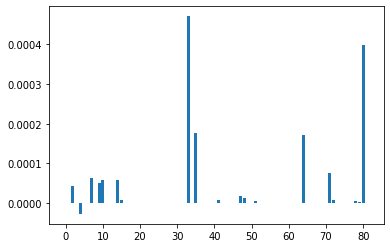

In [ ]:
from matplotlib import pyplot
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
#Decision tree classifier using sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3 = dt.predict(x_test)

In [ ]:
acc3 = accuracy_score(y_test,y_pred3)
acc3

1.0

In [ ]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#KNN (k-nearest neighbors) classifier using Sklearn
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3,algorithm='ball_tree')

In [ ]:
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [ ]:
y_pred4 = clf.predict(x_test)
acc4 =   accuracy_score(y_test,y_pred4)
acc4

0.6715649923574012

In [ ]:
#Support Vector Machine using Sklearn
#from sklearn.svm import SVC
#svc1 = SVC(C=50,kernel='rbf',gamma=1)     

#svc1.fit(x_train,y_train)

In [ ]:
#y_pred4 = svc1.predict(x_test)

In [ ]:
#from sklearn.metrics import accuracy_score
#acc4=accuracy_score(y_test,y_pred4)
#acc4